In [2]:
import numpy as np
import os
import pandas as pd

# I Load the  file
with np.load('cifar4-train.npz') as data:
    cifar4_data = dict(data.items())

print('It is a dictionary with keys:', list(cifar4_data.keys()))

It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [3]:
X=cifar4_data['overfeat']
y=cifar4_data['labels']
P=cifar4_data['pixels']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Split the train set in train and validate
X_tr, X_va, y_tr, y_va = train_test_split(
    X_tr, y_tr, test_size=0.2, random_state=0)

In [5]:
P_tr, P_te = train_test_split(
    P, test_size=0.2, random_state=0)

# Split the train set in train and validate
P_tr, P_va, = train_test_split(
    P_tr, test_size=0.2, random_state=0)

In [6]:
# Create a k-NN classifier with default values
# i set the # of componenents of the PCA to 163 because it represent the 90% of deviations
pipe = Pipeline([
    ('PCA', PCA(n_components=163)),
    ('knn', KNeighborsClassifier())
])

# Fit to train data
pipe.fit(X_tr, y_tr)

# Evaluate on test set
accuracy = pipe.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))


Accuracy: 0.744


In [7]:
from sklearn.model_selection import ParameterGrid

# Define a set of  values to iterate
k_values = np.arange(1, 200,10) 
distance_types = [1, 2] # L1 and L2 distance

# Define a grid of values
grid = ParameterGrid({
    'knn__n_neighbors': k_values,
    'knn__p': distance_types
})

# Save accuracy on test set
test_scores = []

for params_dict in grid:
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(X_tr, y_tr)

    # Save accuracy on test set
    params_dict['accuracy'] = pipe.score(X_te, y_te)

    # Save result
    test_scores.append(params_dict)

score_df=pd.DataFrame(test_scores)
score_df

,accuracy,knn__n_neighbors,knn__p
0,0.676,1,1
1,0.671,1,2
2,0.760,11,1
3,0.752,11,2
4,0.776,21,1
5,0.780,21,2
6,0.790,31,1
7,0.779,31,2
8,0.785,41,1
9,0.775,41,2


In [8]:
# and here the best configuration:
score_df.sort_values(by='accuracy', ascending=False).head(1)

,accuracy,knn__n_neighbors,knn__p
6,0.79,31,1


In [9]:
# Split data into train/test sets
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [10]:
pipe = Pipeline([
    ('PCA', PCA(n_components=163)),
    ('knn', KNeighborsClassifier(n_neighbors=41, p=1))
])

# Fit to train data
pipe.fit(X_tr2, y_tr2)

# Evaluate on test set
accuracy = pipe.score(X_te2, y_te2)
print('k-NN Accuracy (Test set): {:.3f}'.format(accuracy))


k-NN Accuracy (Test set): 0.776


In [11]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=163)

# Apply PCA
pca.fit(X_tr, y=None)

X_transformed = pca.transform(X_tr)


In [12]:
# Fit k-NN on the train set
knn = KNeighborsClassifier(n_neighbors=51, p=1)
knn.fit(X_transformed, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=51, p=1,
           weights='uniform')

In [13]:
from sklearn.neighbors import NearestNeighbors

df=pd.DataFrame(X_transformed)
one_pic=df.head(1)

similar=knn.kneighbors(one_pic, 11) 

In [14]:
df=pd.DataFrame(data=similar[1])

In [15]:
df=df.stack()
df_list=pd.DataFrame(df)
df_list=df_list.reset_index(0).reset_index(drop=True)
df_list.drop('level_0', inplace=True, axis=1)
df_list=df_list[0]
df_distance=pd.DataFrame(data=similar[0])
df_distance=df_distance.stack()
df_list_d=pd.DataFrame(df_distance)
df_list_d=df_list_d.reset_index(0).reset_index(drop=True)
df_list_d.drop('level_0', inplace=True, axis=1)
df_list_d=df_list[0]

position: 0
picture #: 0
distance: 0       0.000000
1     377.187112
2     383.456102
3     385.036861
4     396.666117
5     402.056611
6     403.940818
7     405.716535
8     406.225711
9     408.731220
10    409.108301
dtype: float64


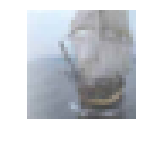

position: 1
picture #: 1098
distance: 377.18711218982935


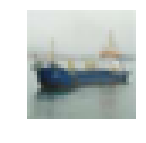

position: 2
picture #: 1932
distance: 383.45610162988305


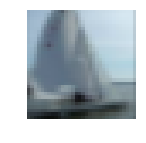

position: 3
picture #: 1449
distance: 385.0368609763682


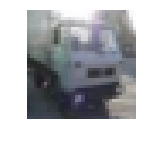

position: 4
picture #: 1274
distance: 396.6661166250706


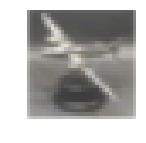

position: 5
picture #: 1198
distance: 402.0566114522517


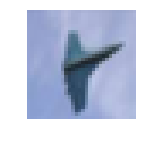

position: 6
picture #: 2428
distance: 403.94081753119826


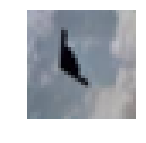

position: 7
picture #: 1820
distance: 405.7165346592665


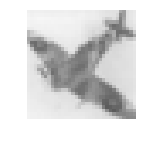

position: 8
picture #: 1853
distance: 406.22571106255054


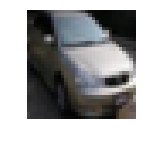

position: 9
picture #: 407
distance: 408.73121985048056


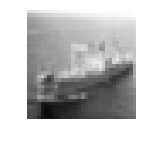

position: 10
picture #: 2910
distance: 409.10830123350024


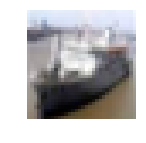

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt


def show_image(idx, X, y):
    # Print its label
    label = y[idx]
    
    
    
    # Get image pixels
    flat_img = P_tr[idx] 
    
    # Reshape into a 32x32x3 array 
    img = flat_img.reshape(32, 32, 3)
    
    
    img = img/255 # Rescale values to [0,1]
    
    # Plot the image
    plt.figure(figsize=(2,2)) 
    plt.imshow(img)
    plt.axis('off') 
    plt.show()
    
i=0 

# I do a loop to get the first picture and it's closer neighboors
for i in range(11):
    print('position:',i)
    print('picture #:', df_list[i])
    print('distance:', df_distance[i])
    
    show_image(df_list[i], P_tr, y )
    

### Boats and Planes are the most recurrent photos, in particular the 2 closest elements are boats.